In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv(r"C:\Users\padal\OneDrive\Desktop\Data Science\Cars_4vars.csv")
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [2]:
import statsmodels.formula.api as smf

In [3]:
#Building the model
model = smf.ols("MPG ~ WT+VOL+SP+HP", data=df).fit()
model

In [4]:
r2 = model.rsquared
print("R squared:",np.round(r2,2))
rmse = np.sqrt(np.mean(model.resid**2))
print("rmse:",np.round(rmse,2))

R squared: 0.77
rmse: 4.35


In [5]:
#Building the model with multicollinearity
model1 = smf.ols("MPG ~ HP+SP", data=df).fit()

In [6]:
r2 = model1.rsquared
print("R squared:",np.round(r2,2))
rmse = np.sqrt(np.mean(model1.resid**2))
print("rmse:",np.round(rmse,2))

R squared: 0.53
rmse: 6.2


In [7]:
import statsmodels.formula.api as smf
model = smf.ols('HP ~ SP',data=df).fit()
r2 = model.rsquared
VIF = 1 / (1-r2)
print("VIF",np.round(VIF,2))

VIF 19.37


In [8]:
model2 = smf.ols("MPG ~ VOL+HP", data=df).fit()

In [9]:
#Best fit model
r2 = model2.rsquared
print("R squared:",np.round(r2,2))
rmse = np.sqrt(np.mean(model2.resid**2))
print("rmse:",np.round(rmse,2))

R squared: 0.75
rmse: 4.53


In [10]:
import statsmodels.formula.api as smf
model = smf.ols('HP ~ VOL',data=df).fit()
r2 = model.rsquared
VIF = 1 / (1-r2)
print("VIF",np.round(VIF,2))

VIF 1.01


In [11]:
df["resid"] = model2.resid
df.head()

,HP,MPG,VOL,SP,WT,resid
0,49,53.700681,89,104.185353,28.762059,9.842729
1,55,50.013401,92,105.461264,30.466833,7.400017
2,55,50.013401,92,105.461264,30.193597,7.400017
3,70,45.696322,92,113.461264,30.632114,4.733373
4,53,50.504232,92,104.461264,29.889149,7.670790


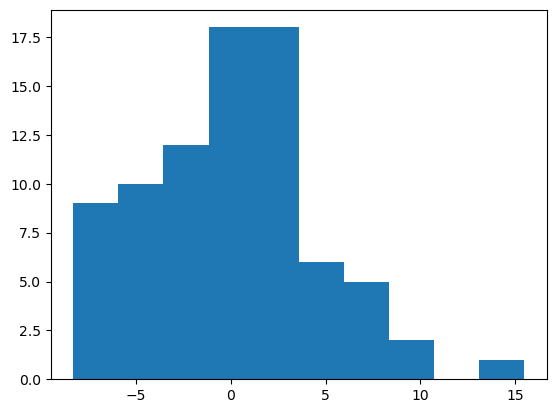

0.4916374933269309

In [12]:
import matplotlib.pyplot as plt
plt.hist(df["resid"])
plt.show()
df["resid"].skew()

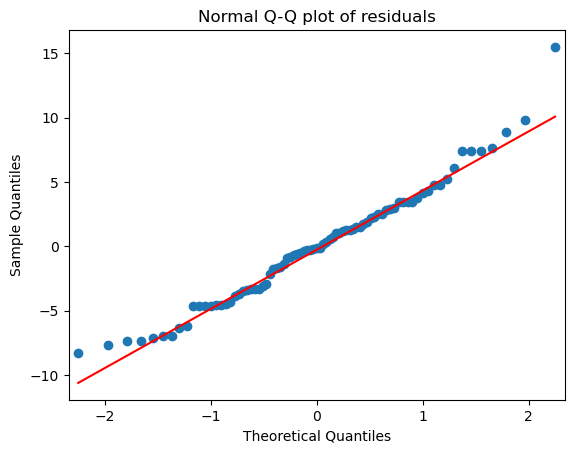

In [13]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
qqplot = sm.qqplot(model2.resid,line="q")
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [14]:
#Cooks Distance
model.get_influence().cooks_distance
(cooks , p_value) = model.get_influence().cooks_distance
df["cooks_distance"] = cooks
df

,HP,MPG,VOL,SP,WT,resid,cooks_distance
0,49,53.700681,89,104.185353,28.762059,9.842729,0.010237
1,55,50.013401,92,105.461264,30.466833,7.400017,0.007891
2,55,50.013401,92,105.461264,30.193597,7.400017,0.007891
3,70,45.696322,92,113.461264,30.632114,4.733373,0.004493
4,53,50.504232,92,104.461264,29.889149,7.670790,0.008416
...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,15.482848,0.585229
77,238,19.197888,115,150.576579,37.923113,1.200162,0.041306
78,263,34.000000,50,151.598513,15.769625,6.091137,0.307240
79,295,19.833733,119,167.944460,39.423099,8.886852,0.108646


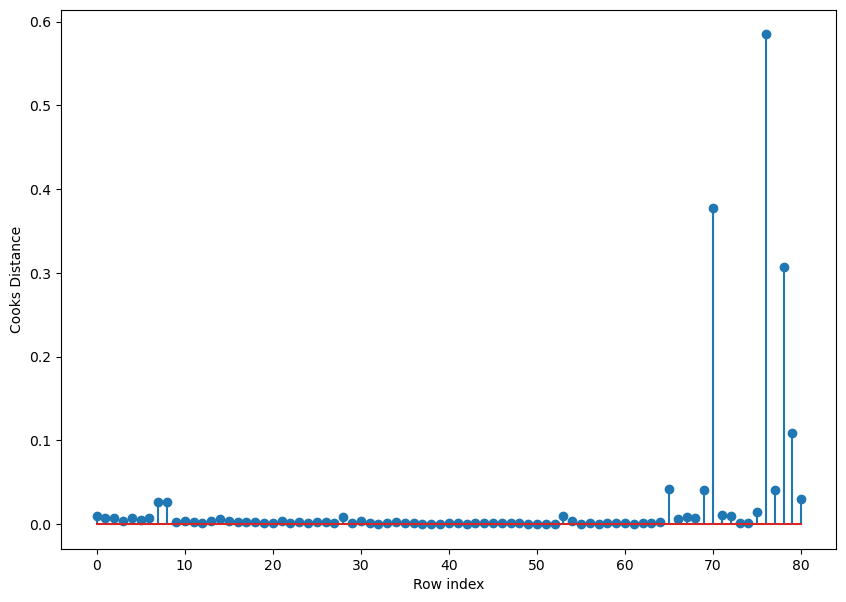

In [15]:
#Plot the influencer values using stem plot
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(10, 7))
plt.stem(np.arange(len(df)), np.round(cooks, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [16]:
# calculating the Leverage's cutoff
leverage_cutoff = 3*((2 + 1)/81)
leverage_cutoff

0.1111111111111111

In [17]:
df["cooks_distance"]>leverage_cutoff
df[df["cooks_distance"]>leverage_cutoff]

,HP,MPG,VOL,SP,WT,resid,cooks_distance
70,280,19.678507,50,164.598513,15.823060,-6.359864,0.378232
76,322,36.900000,50,169.598513,16.132947,15.482848,0.585229
78,263,34.000000,50,151.598513,15.769625,6.091137,0.307240


In [18]:
df.shape

(81, 7)

In [19]:
df.drop([70,76,78],inplace=True)

In [20]:
df.shape

(78, 7)

In [21]:
model2 = smf.ols("MPG ~ VOL+HP", data=df).fit()

In [22]:
#Best fit model
r2 = model2.rsquared
print("R squared:",np.round(r2,2))
rmse = np.sqrt(np.mean(model2.resid**2))
print("rmse:",np.round(rmse,2))

R squared: 0.81
rmse: 3.94
